In [1]:
import pandas as pd

In [48]:
l2s = []
with open('2023_q1_top_25_l2s.txt', 'r') as f:
    for l in f:
        if len(l.replace('\n', '').strip()) > 0:
            l2s.append(l.replace('\n', '').strip())

In [50]:
len(l2s)

25

In [51]:
df = pd.read_csv('Initial Attribute Definition for First Release - UPDATED SHEET .csv')

In [59]:
len(df)

31305

In [60]:
df_nofreetext = df[df['entry mode'] != 'free_text']

In [61]:
len(set(df['attribute_field'])), len(set(df_nofreetext['attribute_field']))

(653, 402)

In [62]:
attr_name_val_tuples = []
for k, i in zip(df_nofreetext['attribute_field'].tolist(), df_nofreetext['category_attributevalue'].apply(eval).tolist()):
    for j in i:
        if isinstance(j, str):
            attr_name_val_tuples.append((k, j))

In [63]:
len(attr_name_val_tuples), len(set(attr_name_val_tuples))

(1009642, 10684)

In [65]:
len(set(attr_name_val_tuples)) / len(set(df_nofreetext.category))

4.019563581640331

In [66]:
len_cat_all = len(set(df_nofreetext['category']))

In [67]:
df_nofreetext_attr_importance = df_nofreetext.groupby('attribute_field').agg({
  'category': lambda x: len(set([i for i in x])) / len_cat_all
}).reset_index()

In [68]:
df_nofreetext_attr_importance

,attribute_field,category
0,3D Image Support,0.000376
1,3D Technology,0.001505
2,Adaptive Sync,0.000752
3,Adjustable Fit,0.000376
4,Adjustable Length,0.000376
...,...,...
397,Wi-Fi Frequency,0.001505
398,Wireless Communication Types,0.014673
399,Wireless Speaker Pairing,0.000376
400,Write Speed,0.001129


In [72]:
df_nofreetext_25l2 = df_nofreetext[df_nofreetext['category'].apply(lambda x: any([x.startswith(i) for i in l2s]))]

In [73]:
len(df_nofreetext_25l2)

11182

In [74]:
sub_attrs = set(df_nofreetext_25l2.attribute_field)

In [75]:
covered_attrs = df_nofreetext_attr_importance[df_nofreetext_attr_importance.attribute_field.apply(lambda x: x in sub_attrs)]

In [76]:
leftover_attrs = df_nofreetext_attr_importance[df_nofreetext_attr_importance.attribute_field.apply(lambda x: x not in sub_attrs)]

<AxesSubplot: ylabel='Frequency'>

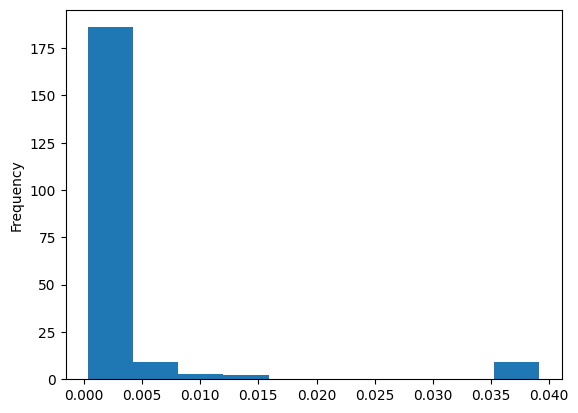

In [77]:
leftover_attrs['category'].plot.hist()

In [78]:
leftover_attrs[leftover_attrs['category'] > .03]

,attribute_field,category
106,Features,0.039127
210,Material,0.038751
228,Model is Wearing (Size),0.037246
250,Occasion,0.037246
283,Print,0.038751
333,Sizing - Origin Country,0.037246
350,Style,0.038751
377,Unit of Measurement,0.037622
388,Wash,0.035741


<AxesSubplot: ylabel='Frequency'>

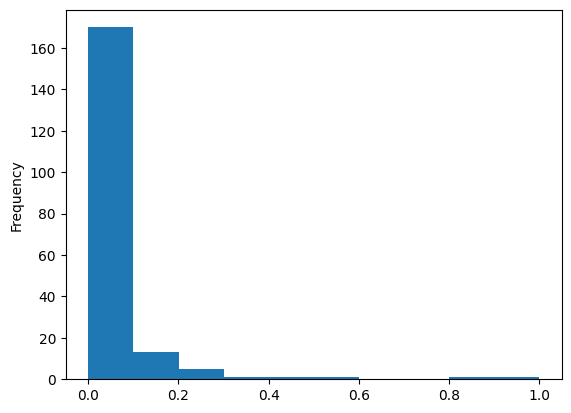

In [79]:
covered_attrs['category'].plot.hist()

In [80]:
covered_attrs[covered_attrs['category'] > .5]

,attribute_field,category
9,Alpha Size,0.868322
213,Materials,0.568849
282,Primary Color,1.000000
